In [26]:
%pip install tensorflow

## **Data Preprocessing**


In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
from sklearn import datasets,metrics
cancer=datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [29]:
#independent variables or matrix of features
x=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
x.tail()#last 5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [30]:
#dependent var
y=cancer.target
print(y)
print()

print(cancer.target_names)
print()
#0 for malignant & 1 for benign

x.shape, y.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

((569, 30), (569,))

In [31]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape
#80% to train , 20% to test

((455, 30), (114, 30))

In [32]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [33]:
print(x_train)
#we see that the values are scaled now
x_train.shape,x_test.shape
#to process the dataset we have to change dimension from 1d to 2d

[[-1.15036482 -0.39064196 -1.12855021 ... -0.75798367 -0.01614761
  -0.38503402]
 [-0.93798972  0.68051405 -0.94820146 ... -0.60687023  0.09669004
  -0.38615797]
 [ 0.574121   -1.03333557  0.51394098 ... -0.02371948 -0.20050207
  -0.75144254]
 ...
 [-1.32422924 -0.20048168 -1.31754581 ... -0.97974953 -0.71542314
  -0.11978123]
 [-1.24380987 -0.2245526  -1.28007609 ... -1.75401433 -1.58157125
  -1.00601779]
 [-0.73694129  1.14989702 -0.71226578 ... -0.27460457 -1.25895095
   0.21515662]]


((455, 30), (114, 30))

In [34]:
x_train=x_train.reshape(455,30,1)
x_test=x_test.reshape(114,30,1)
x_train.shape,x_test.shape
#we see it's 2d now

((455, 30, 1), (114, 30, 1))

# **model** **building**

In [35]:
model=tf.keras.models.Sequential() #defining an object

In [36]:
#first cnn layer
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))# 4 params

#batch normalization
#The batch normalization allows each layer of network to learn by itself a little bit more independent
#of other layers.. due to the batch normalization data processing speeds up
model.add(tf.keras.layers.BatchNormalization())

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))
#percentage of neurons we are ignoring during training process 20%
#adding dropout layer is a regularization technique

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#second cnn layer
model.add(tf.keras.layers.Conv1D(filters=64,kernel_size=2,activation='relu'))
#we have increased num of filters in this layer

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

#dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [38]:
#flatten layer
model.add(tf.keras.layers.Flatten())

In [39]:
#dense layer
#this is fully connected layer
model.add(tf.keras.layers.Dense(units=64,activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
#binary output

In [40]:
model.summary()
#first convulutional layer, bn, dropout. second cl,bn,d. flatten,dense(fully connected),output

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 28, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,457 (466.63 KB)

 Trainable params: 119,265 (465.88 KB)

 Non-trainable params: 192 (768.00 B)

In [41]:
#compile model

opt=tf.keras.optimizers.Adam(learning_rate=0.00005) #defining a var for optimizer
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

## **model training**

In [42]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5034 - loss: 0.9336 - val_accuracy: 0.5175 - val_loss: 0.6627
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7350 - loss: 0.4877 - val_accuracy: 0.8158 - val_loss: 0.6239
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8483 - loss: 0.3617 - val_accuracy: 0.8421 - val_loss: 0.5884
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8830 - loss: 0.2746 - val_accuracy: 0.7982 - val_loss: 0.5549
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8934 - loss: 0.2801 - val_accuracy: 0.7632 - val_loss: 0.5242
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9398 - loss: 0.1786 - val_accuracy: 0.7807 - val_loss: 0.4967
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9289 - loss: 0.1822 - val_accuracy: 0.7895 - val_loss: 0.4686
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9414 - loss: 0.1731 - val_accuracy: 0.7982 - v

In [43]:
#we see above that at the end of 50 epochs .. validation accuracy is 96.49 percent and training accuracy is 97.58

## **model prediction**

In [44]:
#with the help of variable y_pred.. we are making individual predictions
threshold=0.5;
y_pred=(model.predict(x_test) > threshold).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [45]:
print(y_pred[49],print(y_test[49]))

0
[0] None


In [46]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [47]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[44  3]
 [ 1 66]]


In [48]:
acc_cm=accuracy_score(y_test,y_pred)
print(acc_cm)
#accuracy score is same as validation accuracy

0.9649122807017544


## **learning curve**

In [49]:
def learning_curve(history,epoch): #defining a function

  #training vs validation accuracy
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'],loc='upper left')
  plt.show()

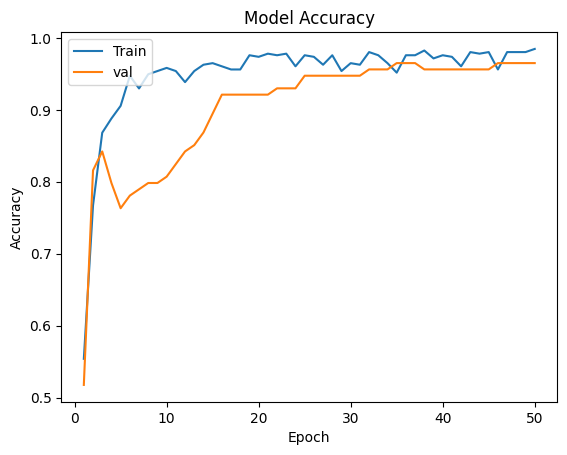

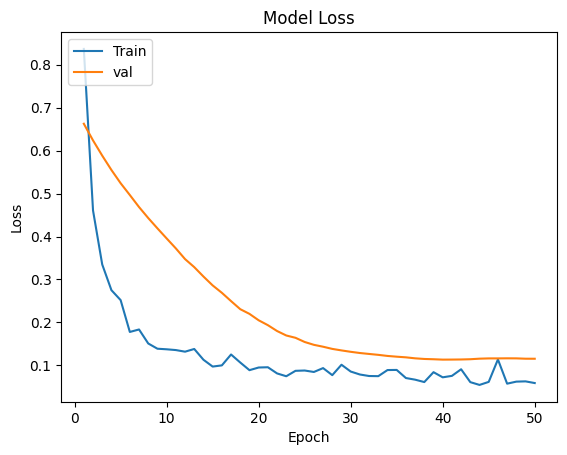

In [50]:
learning_curve(history,50)

both training and validation accuracy are increasing. both training and validation loss are decreasing. meaning our model is not over or under fitted .it's working fine.

In [52]:
!git config --global user.name "nidhi22-11"
!git config --global user.email "nidhi.7mailbox.com"


In [61]:
!git clone https://github.com/nidhi22-11/Breast-Cancer-Diagnosis-CNN.git


Cloning into 'Breast-Cancer-Diagnosis-CNN'...


In [64]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [65]:
!ls "/content/drive/MyDrive/"


 aadhar_card.pdf	  'Nidhi_Resume (1).pdf'   Resume_Nidhi.pdf
'Colab Notebooks'	  'Nidhi_Resume (2).pdf'   Resume.pdf
 NIDHI_EE.pdf		   Nidhi_Resume.pdf	  'resuuume (1).pdf'
 Nidhi_Kumari_Resume.pdf  'Resume_Nidhi (1).pdf'
